<h1><center>IAGA Summer School 2019</center></h1>

<h1><center>Accessing Swarm data and models with VirES</center></h1>

VirES is a platform for data access, analysis, and visualisation for ESA's magnetic mission, *Swarm*

This tutorial introduces the Python interface to VirES, `viresclient`

For more information see:
- https://vires.services/
- https://viresclient.readthedocs.io
- https://earth.esa.int/web/guest/missions/esa-eo-missions/swarm/mission-overview

## 0. Configuration

To access VirES through Python code, you first need to generate an authentication token from your VirES account:

1. Create a user account at https://vires.services/ if you haven't already done so
2. Login there and go to settings (top right: the button with your user name)
3. Select "Manage access tokens" and follow the instructions to create a token (see first part of video)
5. Paste the token into the code below and run it once.
6. The default has now been configured and you won't need to provide the token again.

This can also be done via the command line. For more info, see https://viresclient.readthedocs.io/en/latest/installation.html

In [1]:
%%HTML
<iframe width="840" height="472" src="https://www.youtube.com/embed/L25IvTwgjG4" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [ ]:
from viresclient import ClientConfig

cc = ClientConfig()
cc.set_site_config("https://vires.services/ows", token="...")
cc.default_url = "https://vires.services/ows"
cc.save()

## 1. Fetching some data

Import the `SwarmRequest` object which provides the VirES interface, and `datetime` which gives convenient time objects which can be used by `SwarmRequest.get_between()`

In [2]:
from viresclient import SwarmRequest
import datetime as dt
%matplotlib inline

The following code will fetch one day (i.e. around 15 orbits) of the scalar (`F`) measurements from Swarm Alpha. The data are then loaded as a `pandas` dataframe. `sampling_step="PT10S"` donwsamples the data to 10 seconds, from the `MAGx_LR` default of 1 second.

In [3]:
request = SwarmRequest()
request.set_collection("SW_OPER_MAGA_LR_1B")
request.set_products(
    measurements=["F"],
    sampling_step="PT10S"
)

data = request.get_between(
    start_time=dt.datetime(2016,1,1),
    end_time=dt.datetime(2016,1,2)
)

df = data.as_dataframe()
df.head()

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.359MB)


,Spacecraft,Latitude,Longitude,Radius,F
Timestamp,,,,,
2016-01-01 00:00:00,A,-72.499224,92.793967,6833853.08,46935.8083
2016-01-01 00:00:10,A,-73.130685,93.091639,6833864.74,46908.3246
2016-01-01 00:00:20,A,-73.761537,93.414902,6833875.98,46878.3804
2016-01-01 00:00:30,A,-74.391708,93.766833,6833886.81,46846.0555
2016-01-01 00:00:40,A,-75.021114,94.151014,6833897.24,46811.5549


Try plotting some things to visualise the data. The following shows the variation in field strength measured by the satellite as it passes between high and low latitudes, varying from one orbit to the next as it samples a different longitude.

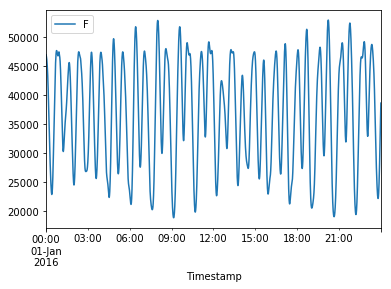

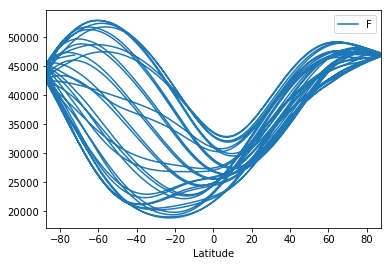

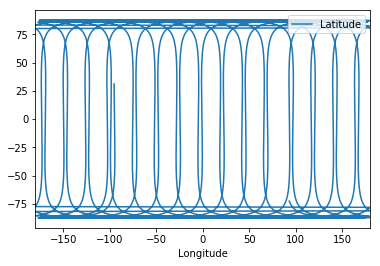

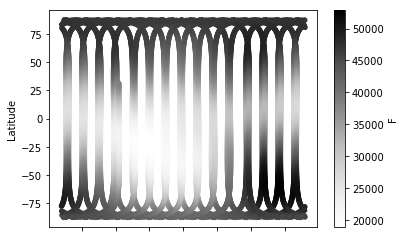

In [4]:
df.plot(y="F")
df.plot(y="F", x="Latitude")
df.plot(y="Latitude", x="Longitude")
df.plot(y="Latitude", x="Longitude", c="F", kind="scatter")

## 2. Fetching model evaluations at the same time

Various (mostly spherical harmonic) models of the magnetic field are produced as Swarm mission products and these are available through VirES. They are evaluated on demand at the same points and times as the data sample points. Here we ask for the `MCO_SHA_2D` model, a dedicated core field model produced from Swarm data. By supplying `residuals=True` we will get the data-model residuals, named in the dataframe as `F_res_MCO_SHA_2D`.

In [5]:
request = SwarmRequest()
request.set_collection("SW_OPER_MAGA_LR_1B")
request.set_products(
    measurements=["F"],
    models=["MCO_SHA_2D"],
    residuals=True,
    sampling_step="PT10S"
)

data = request.get_between(
    start_time=dt.datetime(2016,1,1),
    end_time=dt.datetime(2016,1,2)
)

df = data.as_dataframe()
df.head()

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.359MB)


,Spacecraft,Latitude,Longitude,Radius,F_res_MCO_SHA_2D
Timestamp,,,,,
2016-01-01 00:00:00,A,-72.499224,92.793967,6833853.08,111.980426
2016-01-01 00:00:10,A,-73.130685,93.091639,6833864.74,108.278648
2016-01-01 00:00:20,A,-73.761537,93.414902,6833875.98,104.358770
2016-01-01 00:00:30,A,-74.391708,93.766833,6833886.81,100.296102
2016-01-01 00:00:40,A,-75.021114,94.151014,6833897.24,96.294332


The core field has been removed from the data so the amplitudes are much smaller. Can you interprete the new signals in terms of external fields, i.e. from the ionosphere and magnetosphere?

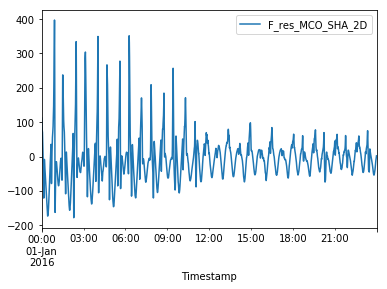

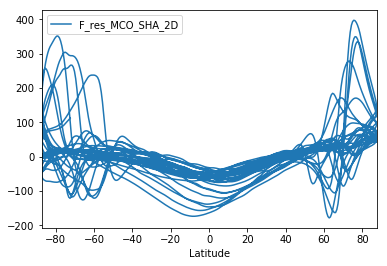

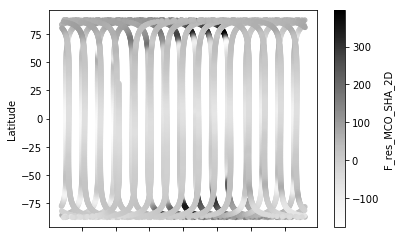

In [6]:
df.plot(y="F_res_MCO_SHA_2D")
df.plot(y="F_res_MCO_SHA_2D", x="Latitude")
df.plot(y="Latitude", x="Longitude", c="F_res_MCO_SHA_2D", kind="scatter")

## 3. Explore the other possibilites through VirES

To find out what other data and models are available, see https://viresclient.readthedocs.io/en/latest/available_parameters.html

For examples see https://github.com/smithara/viresclient_examples (sorry they are a bit messy now and undocumented!)